<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/overfitting/overfitting_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

## Separate data into train and test

In [3]:
prop_training = .8
n_training = int(len(data) * prop_training)
train_test_bool = np.zeros(len(labels), dtype=bool)
items_for_train = np.random.choice(range(len(labels)), n_training, replace=False)
train_test_bool[items_for_train] = True
train_test_bool

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [4]:
# testing wether it is balanced
print('Average of full dataset')
print(torch.mean(labels.float()))

print('Average of training data')
print(torch.mean(labels[train_test_bool].float()))

print('Average of test data')
print(torch.mean(labels[~train_test_bool].float()))

Average of full dataset
tensor(1.)
Average of training data
tensor(1.0167)
Average of test data
tensor(0.9333)


## Model 

In [5]:
data[:5], labels[:5]

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000]]), tensor([0, 0, 0, 0, 0]))

In [21]:
ANNclassify = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)

loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)

In [22]:
print(data.shape)
print(data[train_test_bool, :].shape)
print(data[~train_test_bool, :].shape)

torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


## Train and test the model

In [24]:
num_epochs = 1000
losses = torch.zeros(num_epochs)
ongoingAcc = []

for epochi in range(num_epochs):
  yHat = ANNclassify(data[train_test_bool, :])
  ongoingAcc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == labels[train_test_bool]).float()))

  loss = loss_fun(yHat, labels[train_test_bool])
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [25]:
train_predictions = ANNclassify(data[train_test_bool,:])
train_predictions_labels = torch.argmax(train_predictions, axis=1)
train_accuracy = 100 * torch.mean((train_predictions_labels == labels[train_test_bool]).float())
print(f'train_accuracy: {train_accuracy:.2f}')

train_accuracy: 100.00


In [26]:
test_predictions = ANNclassify(data[~train_test_bool, :])
test_predictions_labels = torch.argmax(test_predictions, axis=1)
test_accuracy = 100 * torch.mean((test_predictions_labels == labels[~train_test_bool]).float())
print(f'Tets accuracy: {test_accuracy:.2f}')

Tets accuracy: 90.00


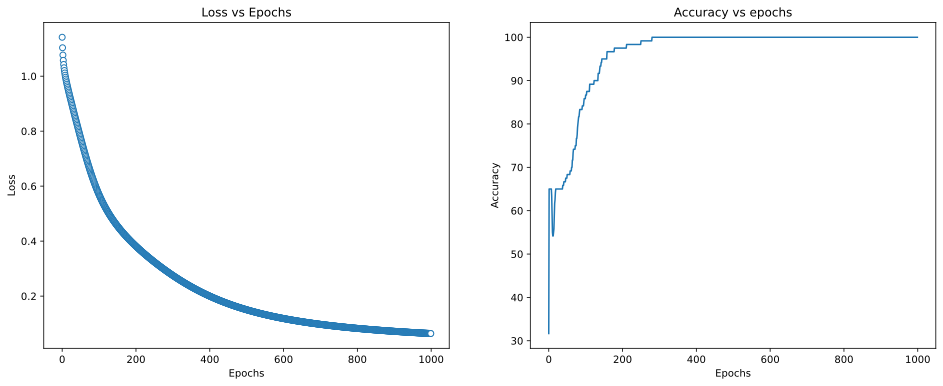

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(losses.detach(), 'o', markerfacecolor='w')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs Epochs')

ax[1].plot(ongoingAcc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy vs epochs')
plt.show()